## Input Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('../Dataset//full_feature.csv')
df.head(3)

,originalRate,size,starRating,AIR_CONDITIONING,BALCONY_TERRACE,BATHROBES,BATHTUB,BLACKOUT_DRAPES_CURTAINS,COFFEE_TEA_MAKER,COMPLIMENTARY_BOTTLED_WATER,...,PARK,HOSPITAL,MUSEUM,GALLERY,PLACE_OF_WORSHIP,TRAIN_STATION,ZOO,ENTERTAINMENT,GARDEN.1,THEATER
0,1227273,46.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,596694,31.0,4.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1450413,52.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Distribution

<Figure size 2400x800 with 0 Axes>

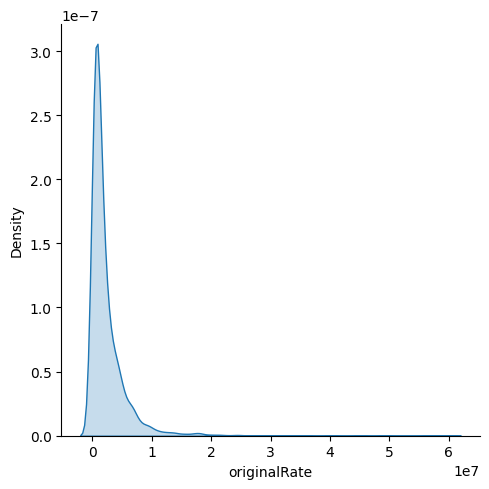

In [3]:
# OriginalRate Distribution
plt.figure(figsize=(30, 10), dpi=80)
sns.displot(df,x="originalRate", kind="kde", fill=True)
plt.show()

In [11]:
# MaxMin OriginalRate
print(f'Original rate maximum value : {df.originalRate.max()}')
print(f'Original rate miimum value : {df.originalRate.min()}')

Original rate maximum value : 60000000
Original rate miimum value : 40313


<Figure size 8000x4800 with 0 Axes>

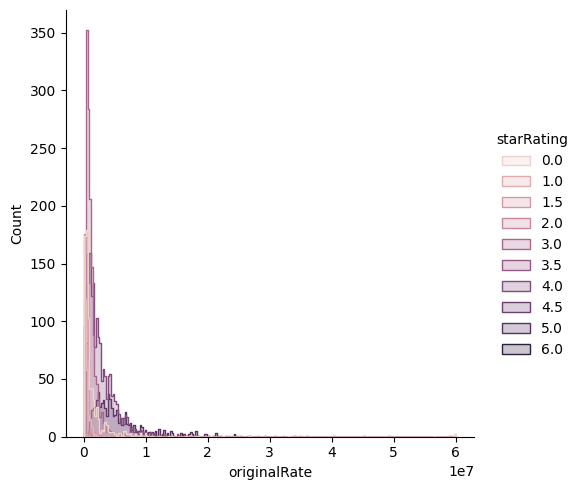

In [28]:
plt.figure(figsize=(50, 30), dpi=160)
sns.displot(df,x="originalRate", hue='starRating' , element="step", fill=True)
plt.show()

In [33]:
def plot_errorbars(arg, **kws):
    np.random.seed(sum(map(ord, "error_bars")))
    x = df.originalRate
    f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout="tight")
    sns.pointplot(x=x, errorbar=arg, **kws, capsize=.3, ax=axs[0])
    sns.stripplot(x=x, jitter=.3, ax=axs[1])
sns.plot_errorbars("sd")

AttributeError: module 'seaborn' has no attribute 'plot_errorbars'

In [22]:
under1 = 0
under2 = 0
under3 = 0
under4 = 0
under5 = 0
under6 = 0
for i in range (len(df)):
    if df.originalRate[i] <= 1*10**7:
        under1 += 1
    elif df.originalRate[i] <= 2*10**7:
        under2 += 1
    elif df.originalRate[i] <= 3*10**7:
        under3 += 1
    elif df.originalRate[i] <= 4*10**7:
        under4 += 1
    elif df.originalRate[i] <= 5*10**7:
        under5 += 1
    elif df.originalRate[i] <= 6*10**7:
        under6 += 1
print(f'Original rate under 10Million : {under1}')
print(f'Original rate under 20Million : {under2}')
print(f'Original rate under 30Million : {under3}')
print(f'Original rate under 40Million : {under4}')
print(f'Original rate under 50Million : {under5}')
print(f'Original rate under 60Million : {under6}')

Original rate under 10Million : 4983
Original rate under 20Million : 118
Original rate under 30Million : 22
Original rate under 40Million : 7
Original rate under 50Million : 3
Original rate under 60Million : 4


In [21]:
under1 = 0
under2 = 0
under3 = 0
under4 = 0
under5 = 0
under6 = 0
under7 = 0
under8 = 0
under9 = 0
under10 = 0
for i in range (len(df)):
    if df.originalRate[i] <= 1*10**6:
        under1 += 1
    elif df.originalRate[i] < 2*10**6:
        under2 += 1
    elif df.originalRate[i] < 3*10**6:
        under3 += 1
    elif df.originalRate[i] < 4*10**6:
        under4 += 1
    elif df.originalRate[i] < 5*10**6:
        under5 += 1
    elif df.originalRate[i] < 6*10**6:
        under6 += 1
    elif df.originalRate[i] < 7*10**6:
        under7 += 1
    elif df.originalRate[i] < 8*10**6:
        under8 += 1
    elif df.originalRate[i] < 9*10**6:
        under9 += 1
    elif df.originalRate[i] <= 10*10**6:
        under10 += 1

print(f'Original rate under 1Million : {under1}')
print(f'Original rate under 2Million : {under2}')
print(f'Original rate under 3Million : {under3}')
print(f'Original rate under 4Million : {under4}')
print(f'Original rate under 5Million : {under5}')
print(f'Original rate under 6Million : {under6}')
print(f'Original rate under 7Million : {under7}')
print(f'Original rate under 8Million : {under8}')
print(f'Original rate under 9Million : {under9}')
print(f'Original rate under 10Million : {under10}')
print(under1+under2+under3+under4+under5+under6+under7+under8+under9+under10)

Original rate under 1Million : 2284
Original rate under 2Million : 1059
Original rate under 3Million : 555
Original rate under 4Million : 350
Original rate under 5Million : 283
Original rate under 6Million : 151
Original rate under 7Million : 131
Original rate under 8Million : 77
Original rate under 9Million : 43
Original rate under 10Million : 50
4983
